In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Dependent variable')

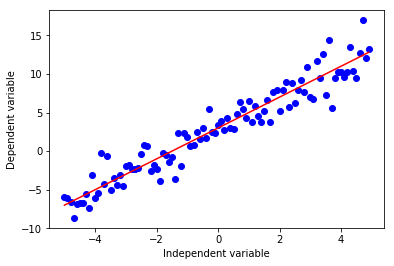

In [6]:
#Degree 1 Function
x = np.arange(-5.0,5.0,0.1)

y = 2*x+3
y_noise = 2* np.random.normal(size = x.size)
ydata = y + y_noise

plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

Text(0, 0.5, 'Dependent variable')

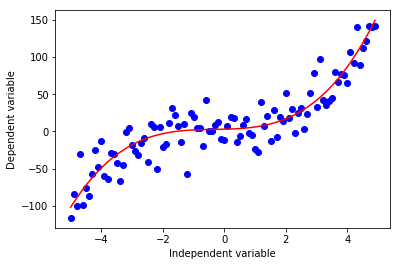

In [8]:
#Cubic Function 
x = np.arange(-5.0,5.0,0.1)

y = x**3 + x**2 + x + 3
y_noise = 20* np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

Text(0, 0.5, 'Dependent variable')

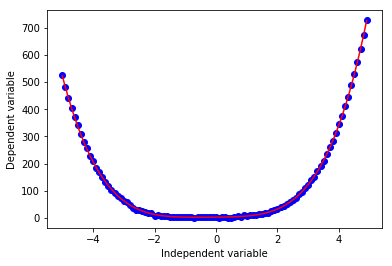

In [9]:
#Quadratic
x = np.arange(-5.0,5.0,0.1)

y = x**4 + x**3 + x**2 + x + 3
y_noise = 2* np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

Text(0, 0.5, 'Dependent variable')

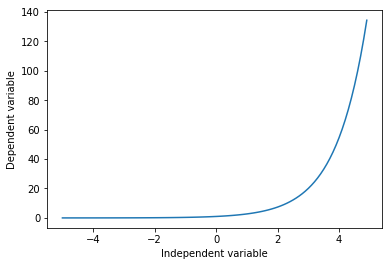

In [10]:
#Exponential
x = np.arange(-5.0,5.0,0.1)
y = np.exp(x)
plt.plot(x,y)
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Dependent variable')

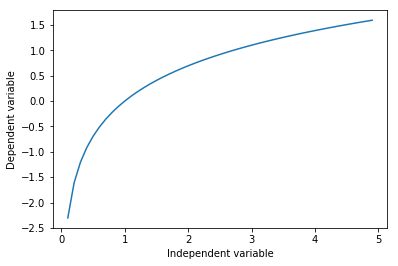

In [11]:
#Logarithmic
x = np.arange(-5.0,5.0,0.1)
y = np.log(x)
plt.plot(x,y)
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

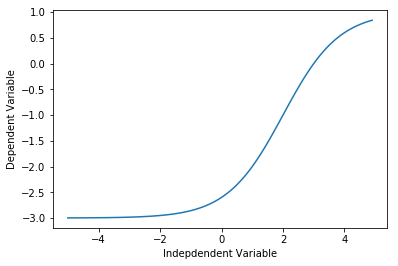

In [12]:
#Sigmoidal/Logistic

X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [13]:
import numpy as np
import pandas as pd

#downloading dataset
#!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Text(0.5, 0, 'Year')

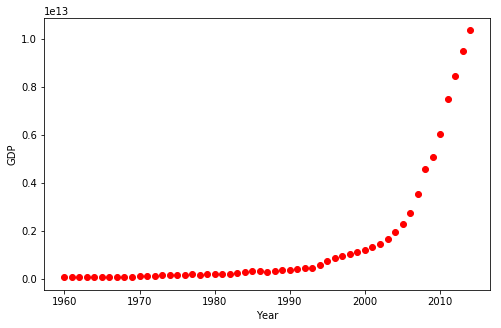

In [16]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')

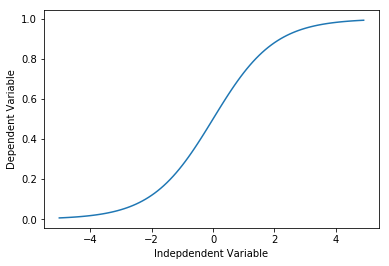

In [17]:
#Choosing a model

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [18]:
# Building a Model

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

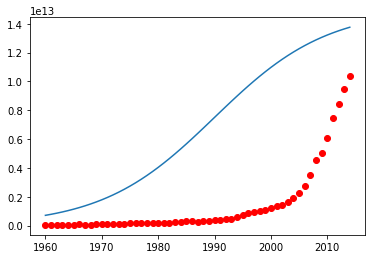

In [19]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [20]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [22]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(sigmoid,xdata,ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451710, beta_2 = 0.997207


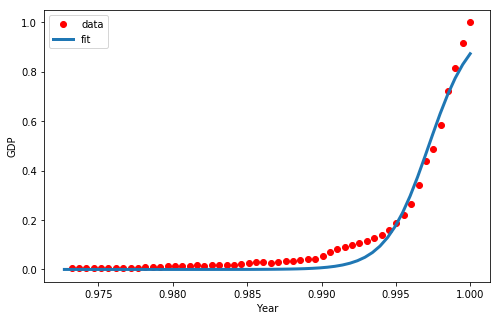

In [23]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [24]:
#Test Accuracy of the model
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.96
